In [1]:
#imports

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#kernel

def gaussianKernel(size, sigma):
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    kernel = np.zeros((size, size), np.float32)
    m = size//2
    n = size//2
    
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            kernel[x+m, y+n] = (1/x1)*x2
    return kernel

In [9]:
#convolution

def convolution(oldimage, kernel):
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]

In [10]:
#filter

def gaussianFilter(image_path, kernel_size, sigma):
    image = Image.open(image_path)
    image = np.asarray(image)

    gaussian_kernel = gaussianKernel(kernel_size, sigma)
    
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_kernel)

    return (im_filtered.astype(np.uint8))

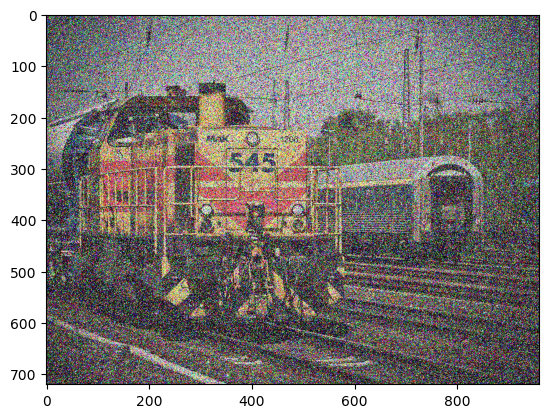

In [2]:
#program

before = Image.open('/drive/train.jpg')
plt.imshow(before)

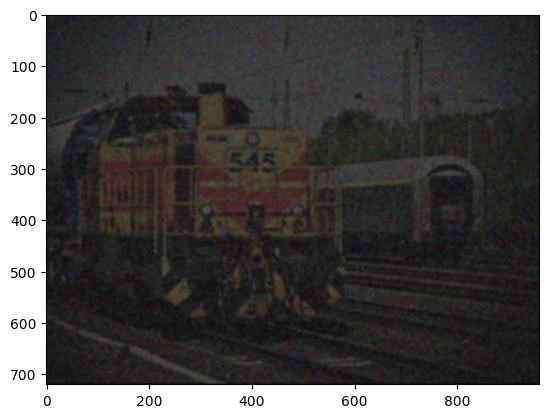

In [11]:
after = gaussianFilter('/drive/train.jpg', 7, 4)
plt.imshow(after)